# OSEMN Exercises

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [2]:
my_list = [i for i in range(10)]
print(my_list)


with open('simple_data.txt', 'w') as f:
    for item in my_list:
        f.write("%s\n" % item)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [3]:
matrix = np.arange(0,25)
my_matrix = matrix.reshape(5,5)
print(my_matrix)

with open('data.txt', 'w') as d:
    for i in range(5):
        for item in my_matrix[i]:
            d.write("%s " % item)
        d.write("\n")



[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [4]:
data = np.loadtxt("data.txt")
print(data)

df = pd.read_csv("data.txt")
df.to_csv('data1.csv', index = None)
print(df)



[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24.]]
        0 1 2 3 4 
0       5 6 7 8 9 
1  10 11 12 13 14 
2  15 16 17 18 19 
3  20 21 22 23 24 


4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [5]:
with  open('credit_card.dat','r') as file:
    file_content=file.read()
    file_lines = file_content.splitlines()
    row_counter=0
    #word_counter =0
    word_size = 6 
    for line in file_lines:
        row_counter+=1
        credit_number = ''
        for i in range(0, len(line)-4, word_size):
            #word_counter+=1
            credit_number= credit_number + chr(int(str(line[i:i+word_size]),2))
        if credit_number == '': break  #avoid last line of the dat file
        print(row_counter,'number: ',credit_number)
        
    
        


1 number:  7648 5673 3775 2271
2 number:  3257 8247 3354 2266
3 number:  2722 0001 4011 6652
4 number:  0661 3063 3742 3150
5 number:  0432 1608 1462 4742
6 number:  5827 2027 8785 7303
7 number:  5774 8528 2087 1117
8 number:  8140 1210 6352 2845
9 number:  5764 1133 7301 7100
10 number:  6456 1737 4126 6726
11 number:  1228 8631 7382 0000
12 number:  7051 0160 5374 3166
13 number:  0618 3587 1630 6376
14 number:  1545 5454 7444 5636
15 number:  6735 3116 3202 6834
16 number:  7287 5011 1547 8413
17 number:  7033 2607 3328 4200
18 number:  2568 5244 1874 5024
19 number:  1684 2253 7570 7118
20 number:  0672 2576 0575 6631
21 number:  6332 8353 8787 1340
22 number:  1813 3361 1175 4211
23 number:  2477 6450 8840 2368
24 number:  5512 3505 2563 1326
25 number:  3083 7882 0621 0025
26 number:  4521 5148 8045 0334
27 number:  7563 3654 8713 5787
28 number:  8324 2664 0476 5561
29 number:  0565 2504 7168 3510
30 number:  5107 5507 1767 0738
31 number:  2462 1821 2448 1443
32 number:  2788 

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [6]:
import json
data = json.load(open('user_data.json'))
#print (data)

import csv
with open('american_express.csv', 'w') as file:
    writer = csv.writer(file, delimiter=" ")
    
    for d in data:
        if d['CreditCardType']=='American Express':
            #print(list(d.items()))
            writer.writerow(list(d.items()))

            

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath yuou see


fields contained in this file: 

class
cap-shape
cap-surface
cap-color
bruises
odor
gill-attachment
gill-spacing
gill-size
gill-color
stalk-shape
stalk-root
stalk-surface-above-ring
stalk-surface-below-ring
stalk-color-above-ring
stalk-color-below-ring
veil-type
veil-color
ring-number
ring-type
spore-print-color
population
habitat


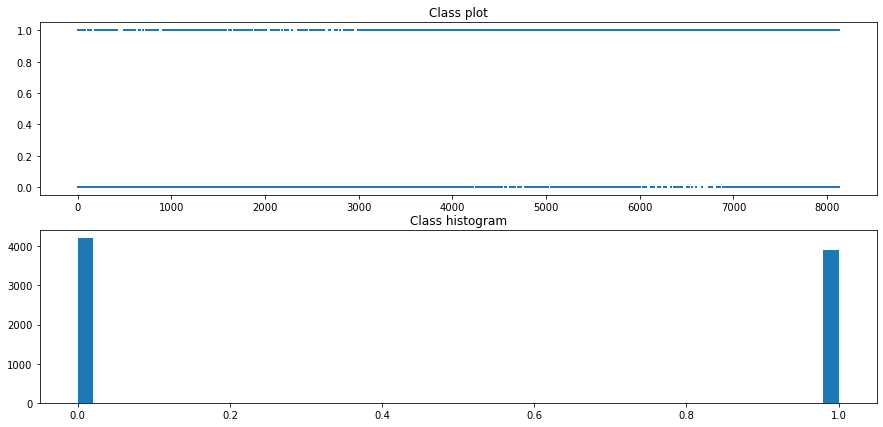

In [7]:
import urllib.request
url ='https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1'

with urllib.request.urlopen(url) as data_file:
    
    data=pd.read_csv(data_file)
    print("fields contained in this file: \n")
    for col in data.columns: 
        print(col) 
    
#!type mushrooms_categorized.csv

import matplotlib.pyplot as plt

%matplotlib inline 

fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(15,7))
ax[0].scatter(np.arange(len(data['class'])),data['class'], marker='+', s=2);
ax[0].set_title('Class plot')
ax[1].hist(data['class'], bins=50)
ax[1].set_title('Class histogram')
plt.show()

From the histogram I see that the class field contains only two values: zero and one.

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

In [8]:
url1 ='https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1'

with urllib.request.urlopen(url1) as data_file:
    
    data=pd.read_csv(data_file)
    #print(data)

Text(0.5, 0, 'features_2')

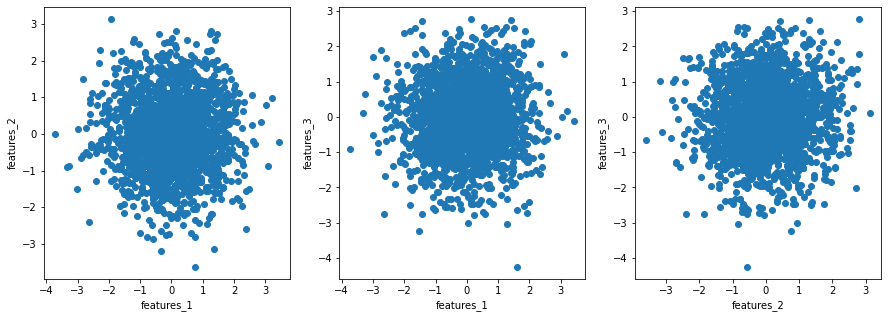

In [9]:
fig, ax = plt.subplots(ncols=3,nrows=1, figsize=(15,5))
ax[0].scatter(data['features_1'],data['features_2'])
ax[1].scatter(data['features_1'],data['features_3'])
ax[2].scatter(data['features_2'],data['features_3'])
ax[0].set_ylabel('features_2')
ax[0].set_xlabel('features_1')
ax[1].set_ylabel('features_3')
ax[1].set_xlabel('features_1')
ax[2].set_ylabel('features_3')
ax[2].set_xlabel('features_2')

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [10]:
with urllib.request.urlopen(url) as data_file:
    df = pd.DataFrame(pd.read_csv(data_file, sep = ",", header = 0, index_col = False))
    df.to_json('filejson.json', orient = "records", date_format = "epoch", double_precision = 10, force_ascii = True, date_unit = "ms", default_handler = None)    
    
data = json.load(open('filejson.json'))
#print (data)


In [11]:
print(data[0])

{'class': 1, 'cap-shape': 5, 'cap-surface': 2, 'cap-color': 4, 'bruises': 1, 'odor': 6, 'gill-attachment': 1, 'gill-spacing': 0, 'gill-size': 1, 'gill-color': 4, 'stalk-shape': 0, 'stalk-root': 3, 'stalk-surface-above-ring': 2, 'stalk-surface-below-ring': 2, 'stalk-color-above-ring': 7, 'stalk-color-below-ring': 7, 'veil-type': 0, 'veil-color': 2, 'ring-number': 1, 'ring-type': 4, 'spore-print-color': 2, 'population': 3, 'habitat': 5}
